In [80]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot as plt
from impl import *
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


4
(150, 4)


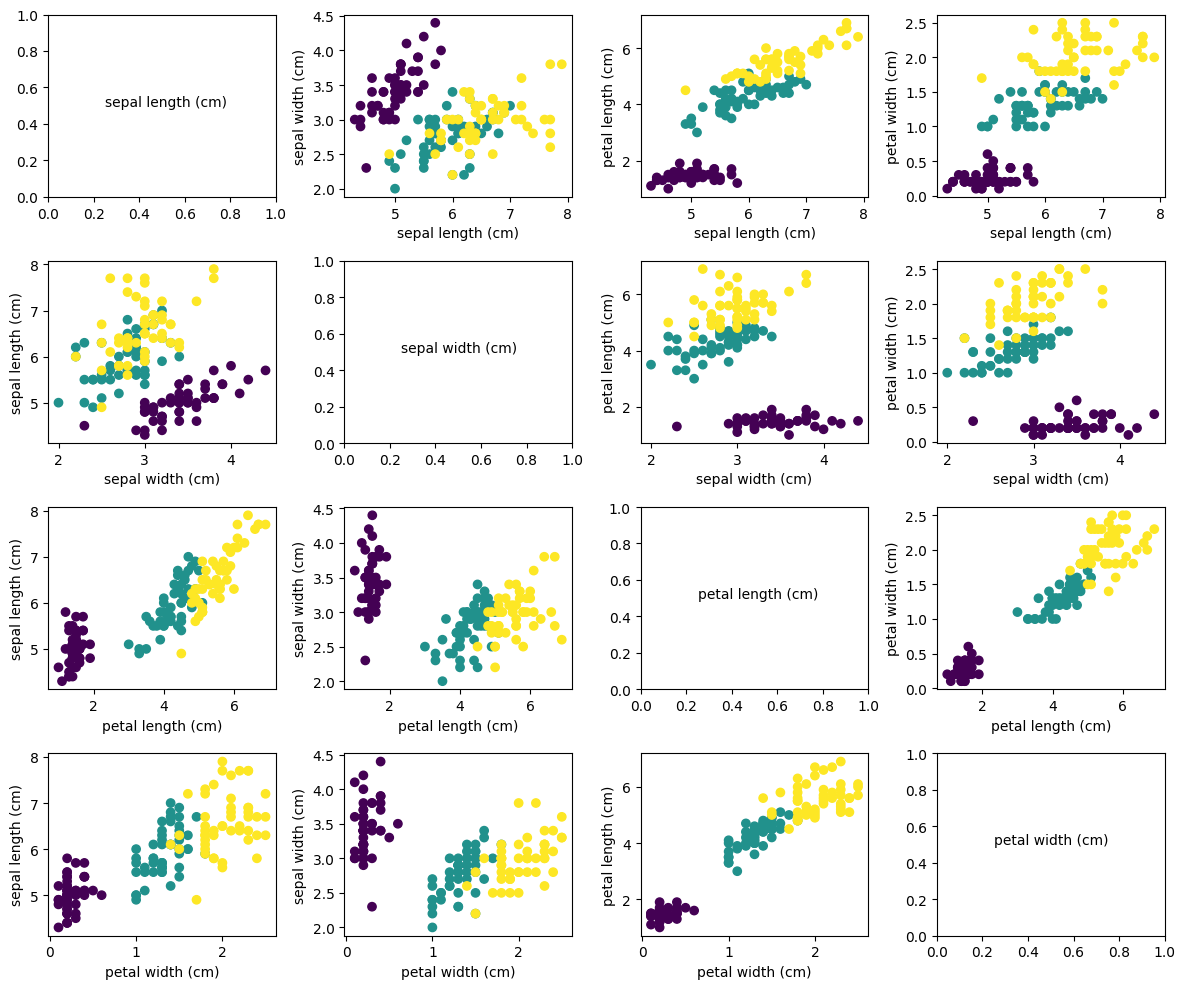

In [92]:
iris_ds = datasets.load_iris()
X = iris_ds.data
Y = iris_ds.target
f_names = iris_ds.feature_names

print(len(f_names))

plt.figure(figsize=(12, 10), dpi=100)
plot_features_data(X, Y, f_names)

In [93]:
f_best = (2, 3)
f_best_names = (f_names[f_best[0]], f_names[f_best[1]])

classifier = PotentialFunctionClassifier(0.1)

classifier.fit(X, Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.5, random_state=10)

model = PotentialFunctionClassifier(0.5)
model.fit(train_x, train_y, 0.000005)
pred = model.predict(test_x)

print("Accuracy: ", metrics.accuracy_score(test_y, pred))


Accuracy:  0.9466666666666667


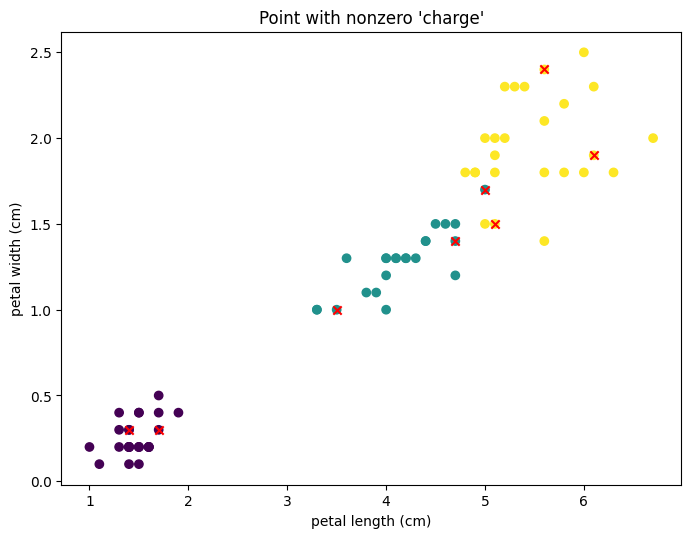

In [94]:
plt.figure(figsize=(8, 6), dpi=100)
plt.title("Point with nonzero 'charge'")
plot_points(train_x[:, f_best[0]], train_x[:, f_best[1]], train_y, model.indexes, f_best_names)

[6, 47, 62, 69]


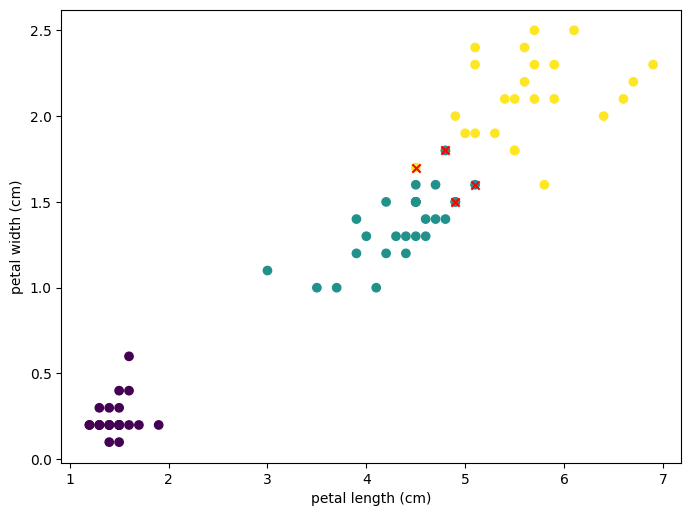

In [95]:
bad_pred_indices = [i for i, _ in  filter(lambda x: x[1], enumerate(pred != test_y))]
print(bad_pred_indices)

plt.figure(figsize=(8, 6), dpi=100)
plot_points(test_x[:, f_best[0]], test_x[:, f_best[1]], test_y, bad_pred_indices, f_best_names)
